In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
%matplotlib inline

#Create dataframes with files
city= pd.read_csv('C:\\Pri doc\\priti\\Projects\\Myproject\\Berkely\\Week 3 Python\\city_data.csv')
ride= pd.read_csv('C:\\Pri doc\\priti\\Projects\\Myproject\\Berkely\\Week 3 Python\\ride_data.csv')


In [2]:
city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
#Average Fare ($) Per City
#Total Number of Rides Per City
ride_data = ride.groupby(['city']).agg({'fare':['mean'],'ride_id':['count']})
ride_data
ride_data.columns = ride_data.columns.droplevel(1)
ride_data.columns

Index(['fare', 'ride_id'], dtype='object')

In [5]:
ride_data
ride_data=ride_data.reset_index()

In [6]:
#% of Total Fares by City Type
merged_data = pd.merge(city,ride_data,on='city')

In [84]:
merged_data.head()

,city,driver_count,type,fare,ride_id,type_id
0,Kelseyland,63,Urban,21.806429,28,3
1,Nguyenbury,8,Urban,25.899615,26,3
2,East Douglas,12,Urban,26.169091,22,3
3,West Dawnfurt,34,Urban,22.330345,29,3
4,Rodriguezburgh,52,Urban,21.332609,23,3


In [7]:
merged_data.columns

Index(['city', 'driver_count', 'type', 'fare', 'ride_id'], dtype='object')

In [8]:
merged_data2=merged_data.groupby(['type']).agg({'driver_count':['mean'],'fare':['mean'],'ride_id':['mean']})
merged_data2.head()
merged_data2=merged_data2.reset_index()
merged_data2.columns = merged_data2.columns.get_level_values(0)
merged_data2.columns

Index(['type', 'driver_count', 'fare', 'ride_id'], dtype='object')

In [9]:
merged_data2.rename(columns={'type': 'CityType','driver_count':'%of_Total_Drivers' ,'ride_id':'%of_Total_Rides','fare': '%of_Total_Fares'}, inplace=True)

In [10]:
merged_data2

,CityType,%of_Total_Drivers,%of_Total_Fares,%of_Total_Rides
0,Rural,5.777778,34.207143,6.944444
1,Suburban,15.190476,30.962713,15.642857
2,Urban,39.500000,24.603991,24.621212


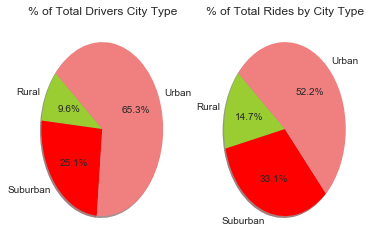

In [16]:
data1 = merged_data2['%of_Total_Drivers']
data2 = merged_data2['%of_Total_Fares']
data3 = merged_data2['%of_Total_Rides']

labels = merged_data2.CityType
explode = (0, 0, 0)

# create a figure with two subplots
fig = plt.figure()
fig, (ax1, ax2 ) = plt.subplots(1, 2 )

# plot each pie chart in a separate subplot
ax1.pie(data1, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
ax1.set_title ("% of Total Drivers City Type")

ax2.pie(data3,explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
ax2.set_title ("% of Total Rides by City Type")

plt.show()

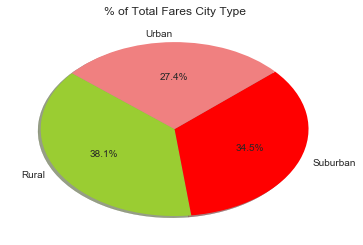

In [18]:
data2 = merged_data2['%of_Total_Fares']

labels = merged_data2.CityType
explode = (0, 0, 0)

# create a figure with two subplots
fig = plt.figure()
fig, (ax1) = plt.subplots(1 )

# plot each pie chart in a separate subplot
ax1.pie(data2, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
ax1.set_title ("% of Total Fares City Type")

plt.show()

In [22]:
merged_data.head()

,city,driver_count,type,fare,ride_id
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


In [55]:
x= merged_data2.CityType
x

d = {"Rural": 1, "Suburban":2,"Urban":3}
merged_data['type_id'] = merged_data['type'].map(d)
merged_data.head()

,city,driver_count,type,fare,ride_id,type_id
0,Kelseyland,63,Urban,21.806429,28,3
1,Nguyenbury,8,Urban,25.899615,26,3
2,East Douglas,12,Urban,26.169091,22,3
3,West Dawnfurt,34,Urban,22.330345,29,3
4,Rodriguezburgh,52,Urban,21.332609,23,3


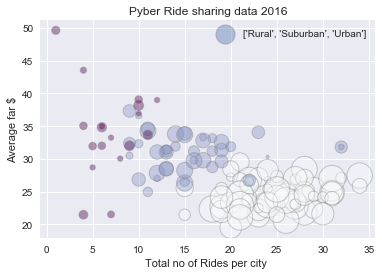

In [87]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
    
# create data
x = merged_data['ride_id']
y = merged_data['fare']
z = merged_data['driver_count']
labels= ["Rural","Suburban","Urban"]
ct= merged_data['type_id']
 
# Change color with c and alpha. I map the color to the city type value.
plt.scatter(x, y, s=z*10, c=ct, cmap="BuPu_r", alpha=0.4, edgecolors="grey", linewidth=1, label=labels)

# Add titles (main and on axis)
plt.xlabel("Total no of Rides per city ")
plt.ylabel("Average far $")
plt.title("Pyber Ride sharing data 2016")
plt.legend(loc=1)
 
plt.show()


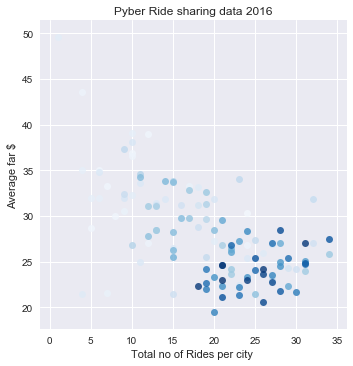

In [89]:
#by seaborn see the density by drivers

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 
# create data
x = merged_data['ride_id']
y = merged_data['fare']
z = merged_data['driver_count']
df = pd.DataFrame({'x':x, 'y':y, 'z':z})

 
# Plot with palette
sns.lmplot( x='x', y='y', data=df, fit_reg=False, hue='z', legend=False, palette="Blues")

plt.xlabel("Total no of Rides per city ")
plt.ylabel("Average far $")
plt.title("Pyber Ride sharing data 2016")
 
